<a href="https://colab.research.google.com/github/heysourin/PyTorch-101/blob/main/Notes/01_PyTorch_Workflow_Fundamentals_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

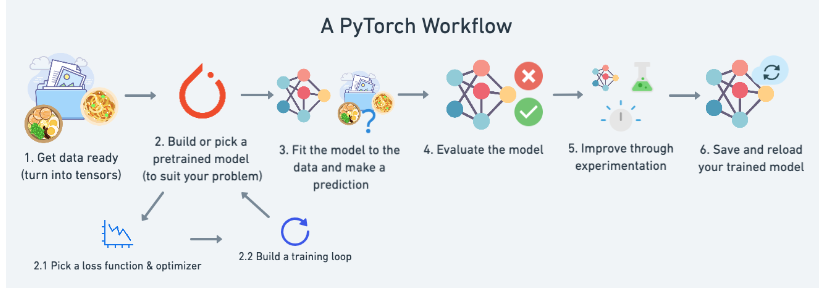

---
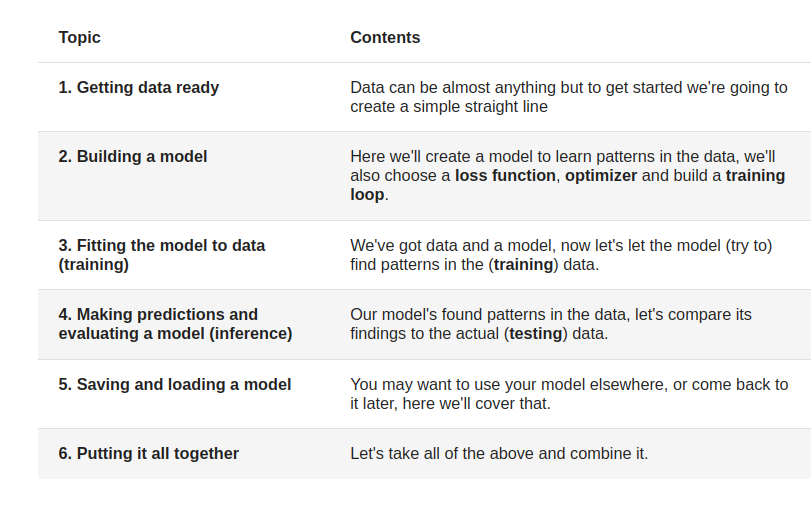

In [1]:
import torch
from torch import nn ## nn contains all of pytorch's building blocks
import matplotlib.pyplot as plt

In [2]:
# Pytorch version
torch.__version__

'2.3.0+cu121'

## Data (Prep and loading)
- Data can be almost anything in machine learning
  * Excel sheet
  * Images of anykind
  * Videos
  * Audio
  * DNA
  * Text

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

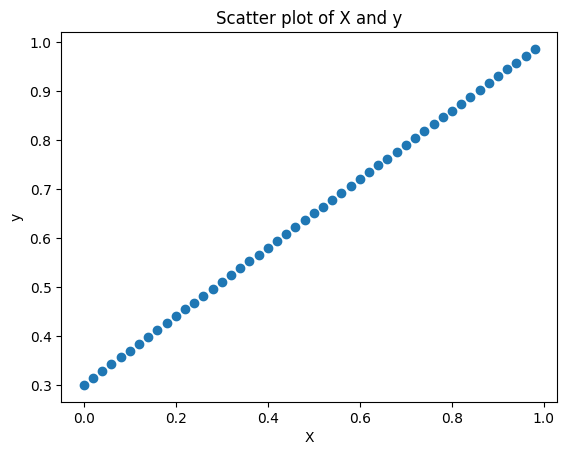

In [5]:
plt.scatter(X.numpy(), y.numpy())
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of X and y')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: torch.Size([40, 1])
Shape of X_test: torch.Size([10, 1])
Shape of y_train: torch.Size([40, 1])
Shape of y_test: torch.Size([10, 1])


In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

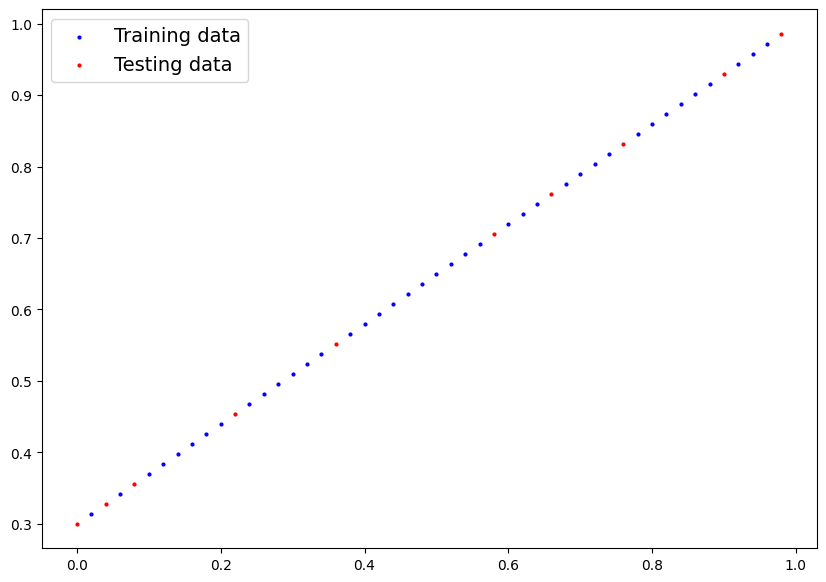

In [8]:
plot_predictions();

---
<br/>
<br/>
<br/>

## **Model:**

* PyTorch model building essentials:

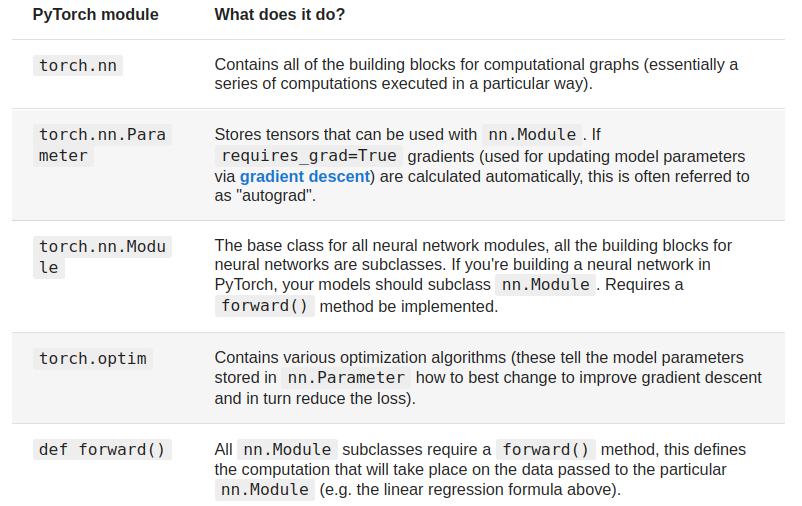

In [9]:
# requires_grad=True --> We are going to calculate gradients during back prop.
nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

Parameter containing:
tensor([0.0991], requires_grad=True)

In [10]:
nn.Parameter(torch.randn([3,2], requires_grad=True, dtype=torch.float))

Parameter containing:
tensor([[-0.5464, -1.0887],
        [-0.3277, -0.1734],
        [-1.2164, -1.3459]], requires_grad=True)

In [11]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float
                                ))

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))


  # Forward method
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias
# """
#   nn.Parameter: This is a special kind of tensor in PyTorch.
#   When a tensor is wrapped with nn.Parameter, it is automatically
#   added to the list of parameters of the containing module
#   (in this case, the LinearRegressionModel class which is a subclass of
#   nn.Module). This means that PyTorch will include this tensor in the
#   list of parameters returned by model.parameters() and it will be
#   optimized during the training process.
# """

In [12]:
# Create a random seed
torch.manual_seed(42)

# Creating instance of the model
model_0 = LinearRegressionModel()

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## **Making predictions:**

In [15]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3510],
        [0.3241],
        [0.4588],
        [0.3847],
        [0.4318],
        [0.1288],
        [0.2500],
        [0.1557],
        [0.2029],
        [0.1423]])

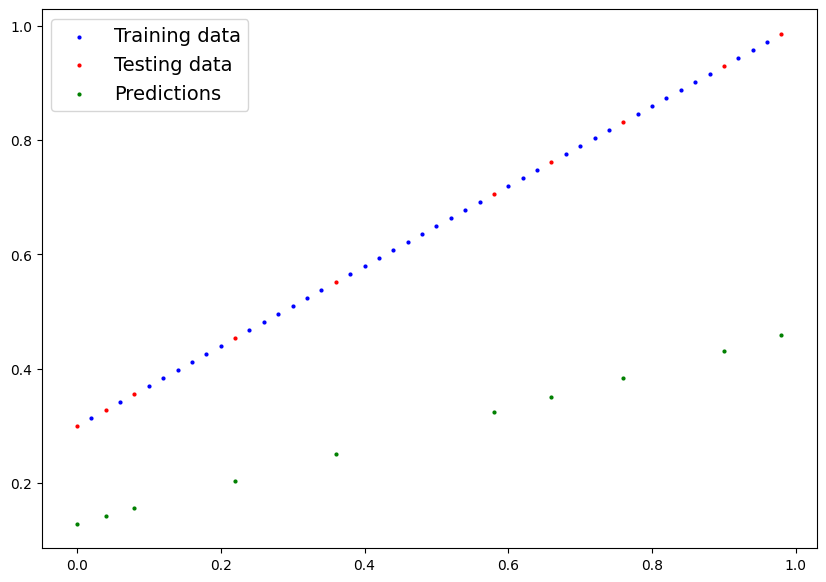

In [16]:
plot_predictions(predictions=y_preds)

## **Use of Loss funtions:**
- PyTorch Official: https://pytorch.org/docs/stable/nn.html#loss-functions
- See where we are on the map:
  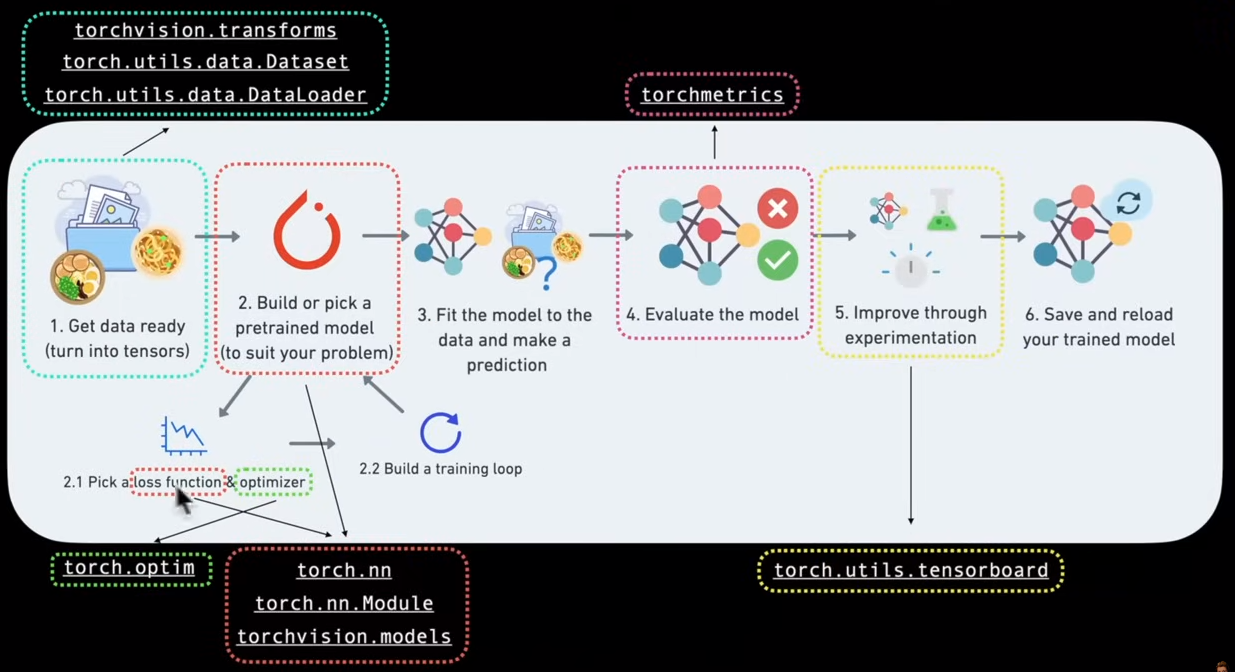
- We are going to use L1Losss

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup otimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

## **Building a training loop:**
- This will be problem specific, but with experience you will gen an idea of what and what doesn't with your particular probelm set.

  For example, for a regression model, a loss function of L1Loss() and an optimizer like SGD will suffice.

  But for a classification problem like classifying whether a photo is of a dog or a cat, you will likely want to use a loss function of BCE Loss

- **Steps:**
  - 0. Loop through the data
  - 1. forward propagation to make prediction from the data
  - 2. calculate the loss
  - 3. Optimizer zero grad
  - 4. Loss backward: Back prop
  - 5. Optimizer step: Gradient descent

In [19]:
# Epochs
epochs = 1

# 0. Loop through the data
for epoch in range(epochs):
  model_0.train()# Set the model to training mode

  # 1. Forward prop
  y_pred = model_0(X_train)

  # 2. Loss
  loss_fn = nn.L1Loss()
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer
  optimizer.zero_grad()

  # 4. Perform Back prop on the loss wrt params of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() #turns off gradient tracking

**How things work in the above:**
-
  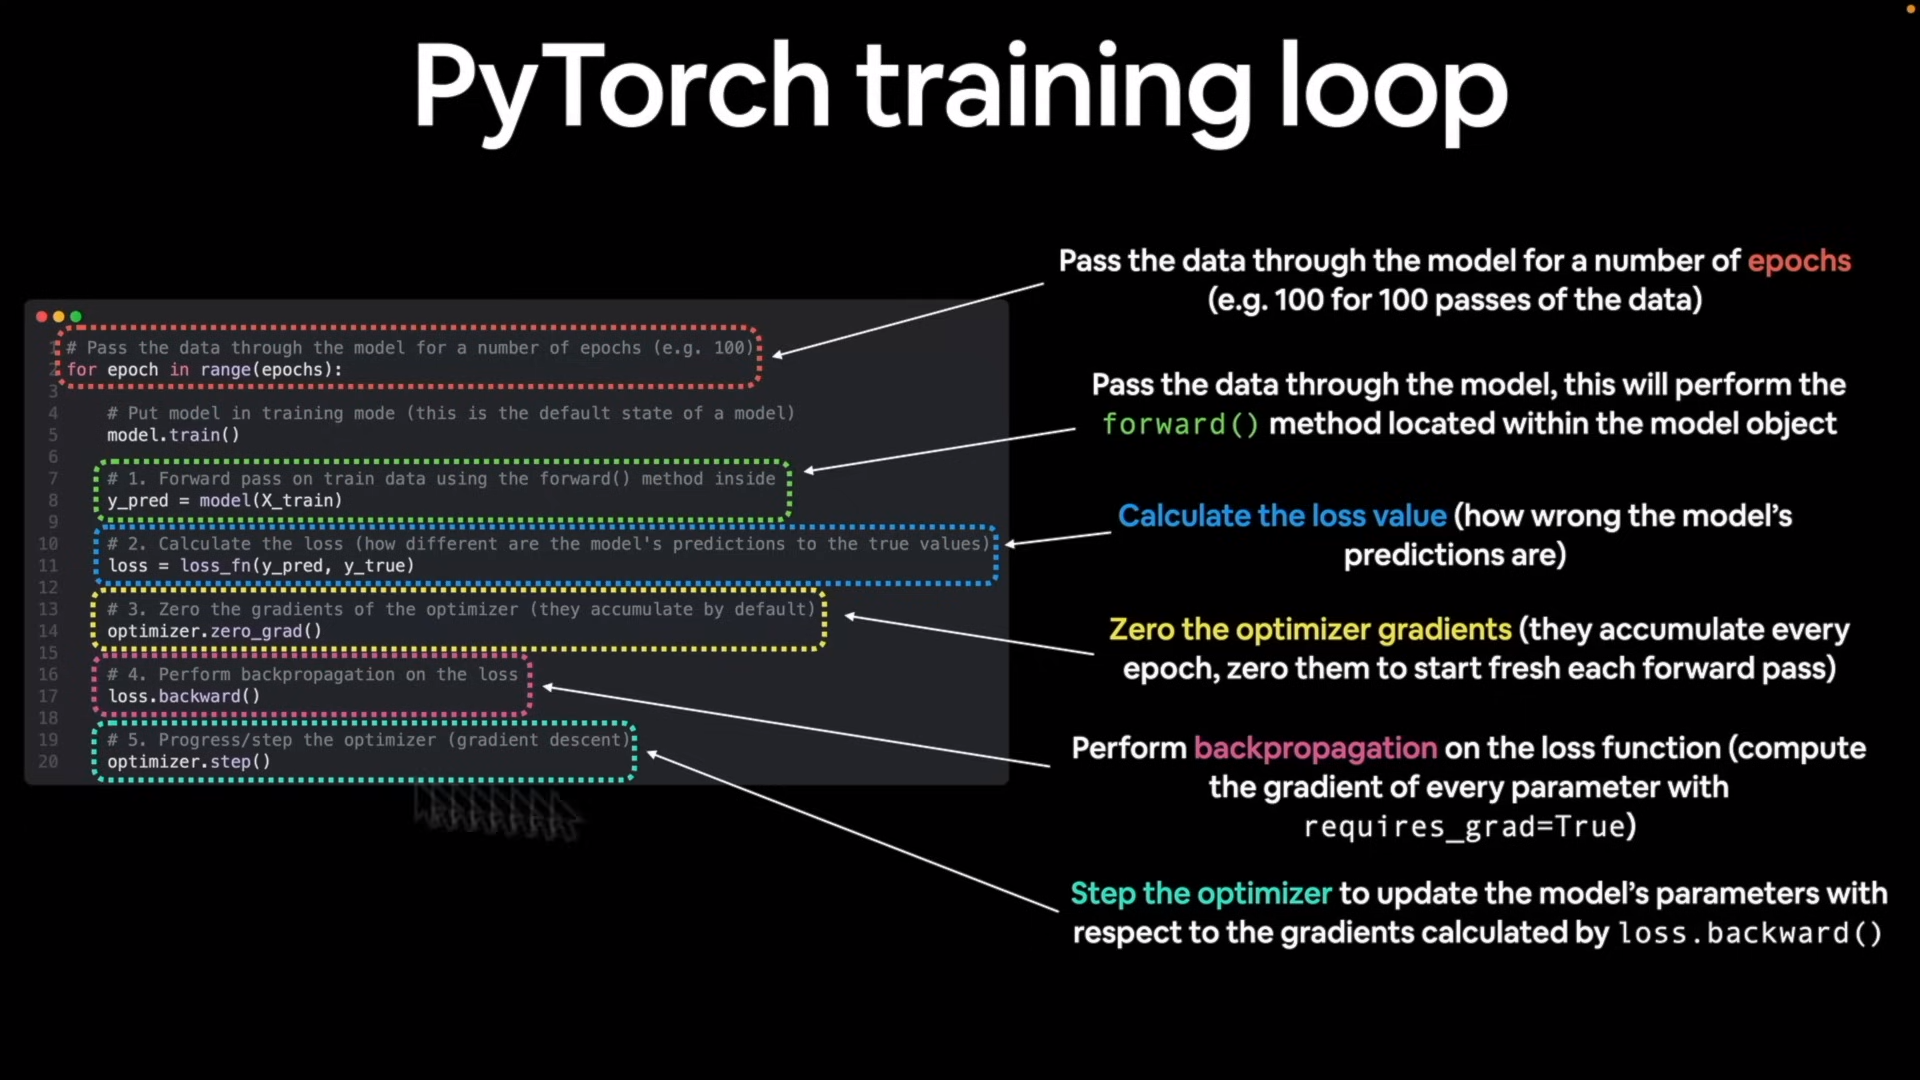